# Test Class Based Reduction

In this notebook, we test a dataset subset function that generates a class-imbalanced dataset. Whereas our normal data subsets take random indices, this function takes in specific labels which are prioritized for keeping when reducing the size.

## Imports

In [1]:
# Third-party
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from minima_volume.dataset_funcs import (
    prepare_datasets,
    save_dataset,
    save_model,
    get_additional_indices,
    get_base_indices,
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# Label Distribution Plotting Function
def plot_label_distribution(labels_tensor, title="Label Distribution"):
    # Convert to CPU and numpy if needed
    if labels_tensor.is_cuda:
        labels = labels_tensor.cpu().numpy()
    else:
        labels = labels_tensor.numpy()
    
    # Get unique labels and their counts
    unique_labels, counts = np.unique(labels, return_counts=True)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(unique_labels, counts)
    
    # Add labels and title
    plt.xlabel('Class Label')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(unique_labels)
    
    # Add value labels on top of bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{count}', ha='center', va='bottom')
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"=== {title} ===")
    print(f"Total samples: {len(labels)}")
    print("Class distribution:")
    for label, count in zip(unique_labels, counts):
        percentage = (count / len(labels)) * 100
        print(f"  Class {label}: {count} samples ({percentage:.1f}%)")

## Input Parameters

In [3]:
data_seed=0

# --- Dataset configuration ---
base_data_size = 60      
dataset_type = "data"   
dataset_quantities = [0, 600-60, 2000 - 60, 6000 - 60, 20000 - 60, 60000 - 60]

## Load Dataset

In [4]:
# User specifies the model module name
from minima_volume.models import MNIST_model_data as model_module

# Generate dataset
x_base, y_base, x_test, y_test = model_module.get_dataset(
    device = device
)

## Dataset Preparation

We generate the various datasets used to train our models here.

In [5]:
# ==============================
# Prepare datasets
# ==============================
x_base_train, y_base_train, x_additional, y_additional = prepare_datasets(
    x_base=x_base,
    y_base=y_base,
    dataset_type=dataset_type,
    dataset_quantities=dataset_quantities,
    base_data_size=base_data_size,
    data_seed=data_seed,
    seed_1=None,
    seed_2=None,
)

Epoch 200/500: Train Loss 0.0001 | Test Loss 1.8319 | accs Train 1.0000 Test 0.6867


Epoch 300/500: Train Loss 0.0000 | Test Loss 1.8836 | accs Train 1.0000 Test 0.6862


Epoch 400/500: Train Loss 0.0000 | Test Loss 1.9309 | accs Train 1.0000 Test 0.6858


Epoch 500/500: Train Loss 0.0000 | Test Loss 1.9669 | accs Train 1.0000 Test 0.6860
Completed training with 0 additional samples of data
Epoch 1/500: Train Loss 2.3214 | Test Loss 2.2004 | accs Train 0.0500 Test 0.2746


Epoch 100/500: Train Loss 0.0013 | Test Loss 0.6735 | accs Train 1.0000 Test 0.8721


Epoch 200/500: Train Loss 0.0005 | Test Loss 0.7188 | accs Train 1.0000 Test 0.8730


Epoch 300/500: Train Loss 0.0002 | Test Loss 0.7498 | accs Train 1.0000 Test 0.8736


Epoch 400/500: Train Loss 0.0002 | Test Loss 0.7727 | accs Train 1.0000 Test 0.8746


Epoch 500/500: Train Loss 0.0001 | Test Loss 0.7910 | accs Train 1.0000 Test 0.8752
Completed training with 540 additional samples of data
Epoch 1/500: Train Loss 2.3176 | Test Loss 2.1926 | accs Train 0.0570 Test 0.3843


Epoch 100/500: Train Loss 0.0061 | Test Loss 0.4398 | accs Train 1.0000 Test 0.9068


Epoch 200/500: Train Loss 0.0011 | Test Loss 0.4983 | accs Train 1.0000 Test 0.9100


Epoch 300/500: Train Loss 0.0005 | Test Loss 0.5269 | accs Train 1.0000 Test 0.9106


Epoch 400/500: Train Loss 0.0003 | Test Loss 0.5471 | accs Train 1.0000 Test 0.9114


Epoch 500/500: Train Loss 0.0002 | Test Loss 0.5623 | accs Train 1.0000 Test 0.9116
Completed training with 1940 additional samples of data
Epoch 1/500: Train Loss 2.3195 | Test Loss 2.1916 | accs Train 0.0628 Test 0.3848


Epoch 100/500: Train Loss 0.0296 | Test Loss 0.2433 | accs Train 0.9973 Test 0.9357


Epoch 200/500: Train Loss 0.0024 | Test Loss 0.2876 | accs Train 1.0000 Test 0.9418


Epoch 300/500: Train Loss 0.0009 | Test Loss 0.3122 | accs Train 1.0000 Test 0.9427


Epoch 400/500: Train Loss 0.0005 | Test Loss 0.3290 | accs Train 1.0000 Test 0.9431


Epoch 500/500: Train Loss 0.0003 | Test Loss 0.3419 | accs Train 1.0000 Test 0.9435
Completed training with 5940 additional samples of data
Epoch 1/500: Train Loss 2.3221 | Test Loss 2.1926 | accs Train 0.0605 Test 0.4079


Epoch 100/500: Train Loss 0.0966 | Test Loss 0.1514 | accs Train 0.9748 Test 0.9550


Epoch 200/500: Train Loss 0.0138 | Test Loss 0.1360 | accs Train 0.9988 Test 0.9610


Epoch 300/500: Train Loss 0.0031 | Test Loss 0.1559 | accs Train 1.0000 Test 0.9622


Epoch 400/500: Train Loss 0.0013 | Test Loss 0.1698 | accs Train 1.0000 Test 0.9630


Epoch 500/500: Train Loss 0.0007 | Test Loss 0.1801 | accs Train 1.0000 Test 0.9633
Completed training with 19940 additional samples of data
Epoch 1/500: Train Loss 2.3228 | Test Loss 2.1924 | accs Train 0.0581 Test 0.4226


Epoch 100/500: Train Loss 0.1249 | Test Loss 0.1349 | accs Train 0.9648 Test 0.9597


Epoch 200/500: Train Loss 0.0431 | Test Loss 0.0830 | accs Train 0.9889 Test 0.9742


Epoch 300/500: Train Loss 0.0147 | Test Loss 0.0801 | accs Train 0.9981 Test 0.9769


Epoch 400/500: Train Loss 0.0052 | Test Loss 0.0890 | accs Train 0.9998 Test 0.9760


Epoch 500/500: Train Loss 0.0024 | Test Loss 0.0989 | accs Train 1.0000 Test 0.9761
Completed training with 59940 additional samples of data


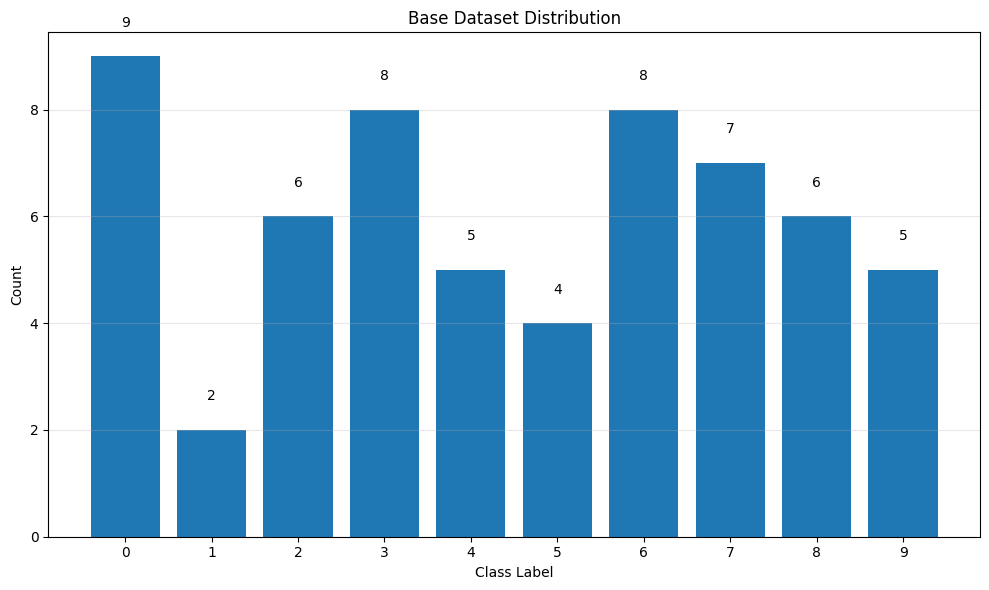

=== Base Dataset Distribution ===
Total samples: 60
Class distribution:
  Class 0: 9 samples (15.0%)
  Class 1: 2 samples (3.3%)
  Class 2: 6 samples (10.0%)
  Class 3: 8 samples (13.3%)
  Class 4: 5 samples (8.3%)
  Class 5: 4 samples (6.7%)
  Class 6: 8 samples (13.3%)
  Class 7: 7 samples (11.7%)
  Class 8: 6 samples (10.0%)
  Class 9: 5 samples (8.3%)


In [6]:
# Example usage:
plot_label_distribution(y_base_train, "Base Dataset Distribution")

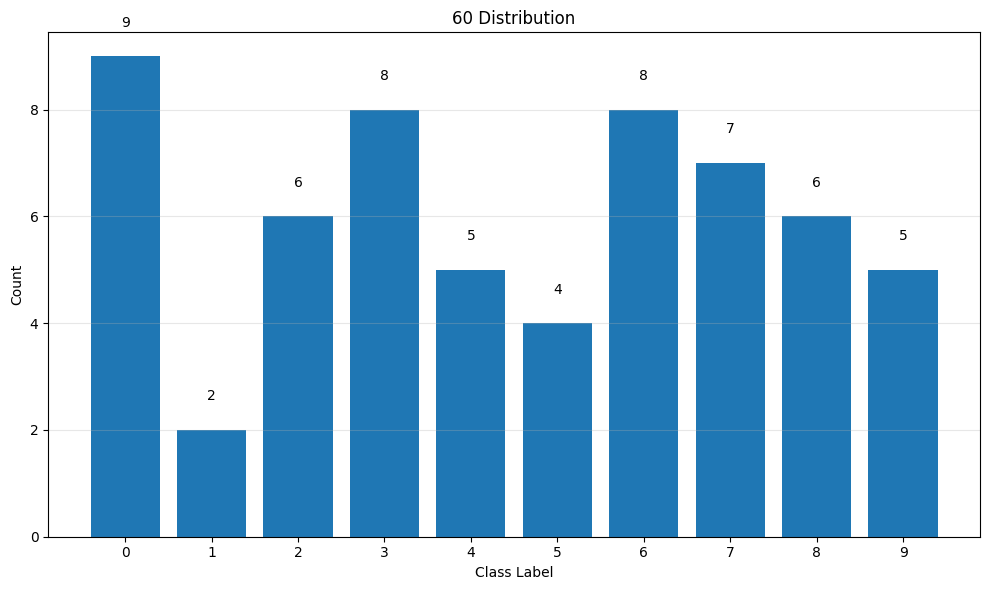

=== 60 Distribution ===
Total samples: 60
Class distribution:
  Class 0: 9 samples (15.0%)
  Class 1: 2 samples (3.3%)
  Class 2: 6 samples (10.0%)
  Class 3: 8 samples (13.3%)
  Class 4: 5 samples (8.3%)
  Class 5: 4 samples (6.7%)
  Class 6: 8 samples (13.3%)
  Class 7: 7 samples (11.7%)
  Class 8: 6 samples (10.0%)
  Class 9: 5 samples (8.3%)


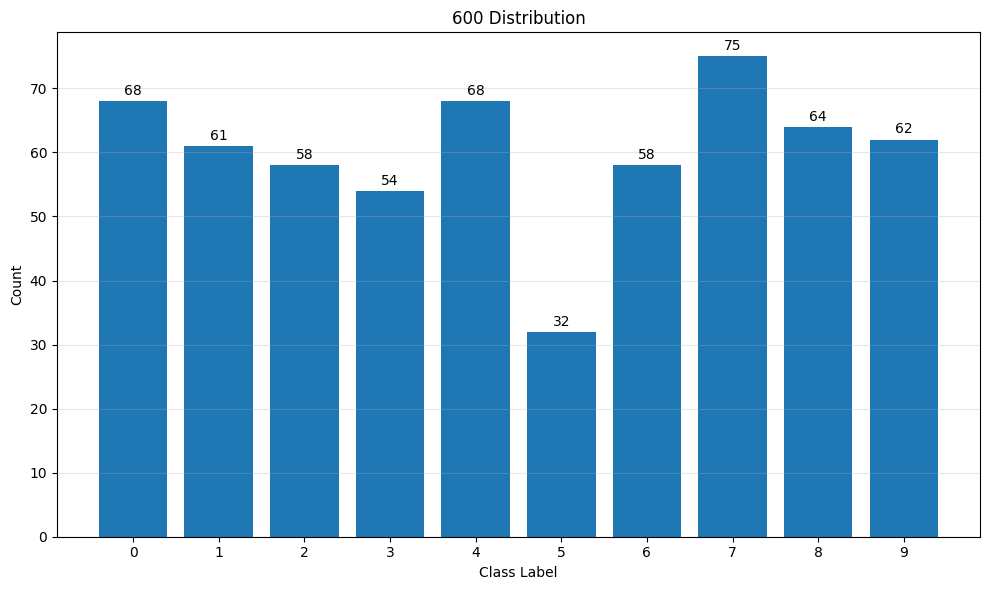

=== 600 Distribution ===
Total samples: 600
Class distribution:
  Class 0: 68 samples (11.3%)
  Class 1: 61 samples (10.2%)
  Class 2: 58 samples (9.7%)
  Class 3: 54 samples (9.0%)
  Class 4: 68 samples (11.3%)
  Class 5: 32 samples (5.3%)
  Class 6: 58 samples (9.7%)
  Class 7: 75 samples (12.5%)
  Class 8: 64 samples (10.7%)
  Class 9: 62 samples (10.3%)


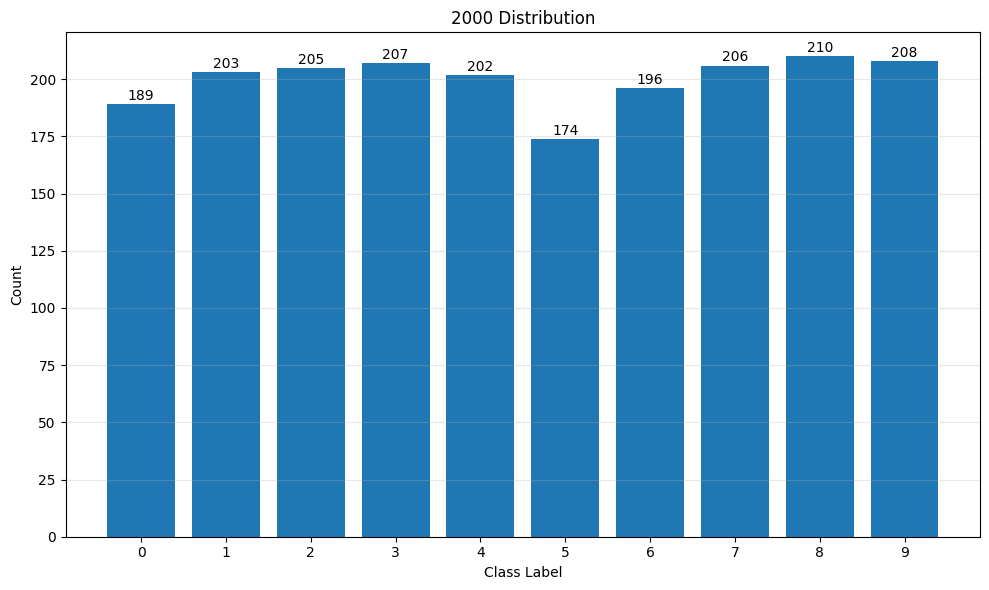

=== 2000 Distribution ===
Total samples: 2000
Class distribution:
  Class 0: 189 samples (9.4%)
  Class 1: 203 samples (10.2%)
  Class 2: 205 samples (10.2%)
  Class 3: 207 samples (10.3%)
  Class 4: 202 samples (10.1%)
  Class 5: 174 samples (8.7%)
  Class 6: 196 samples (9.8%)
  Class 7: 206 samples (10.3%)
  Class 8: 210 samples (10.5%)
  Class 9: 208 samples (10.4%)


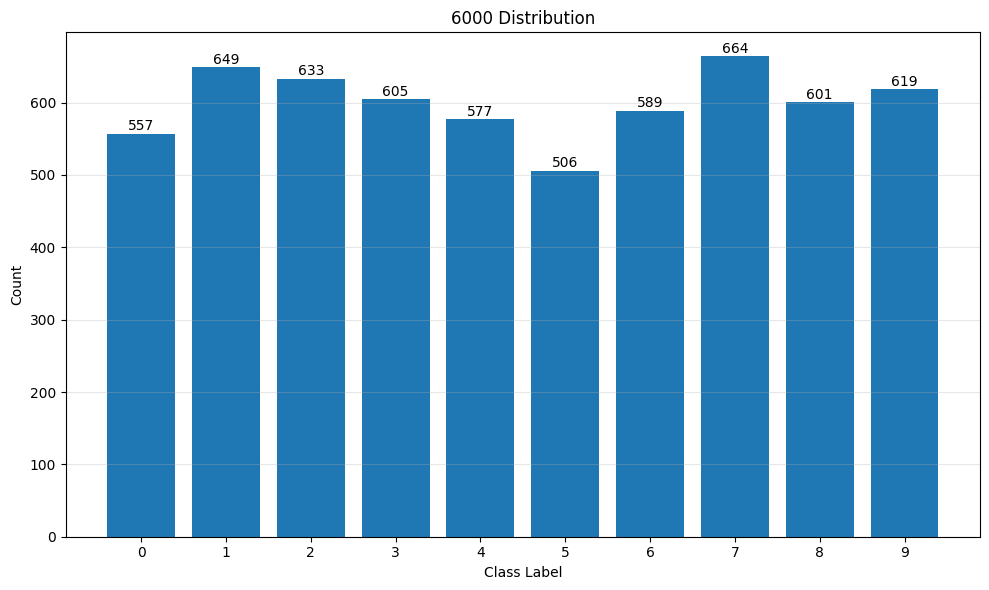

=== 6000 Distribution ===
Total samples: 6000
Class distribution:
  Class 0: 557 samples (9.3%)
  Class 1: 649 samples (10.8%)
  Class 2: 633 samples (10.5%)
  Class 3: 605 samples (10.1%)
  Class 4: 577 samples (9.6%)
  Class 5: 506 samples (8.4%)
  Class 6: 589 samples (9.8%)
  Class 7: 664 samples (11.1%)
  Class 8: 601 samples (10.0%)
  Class 9: 619 samples (10.3%)


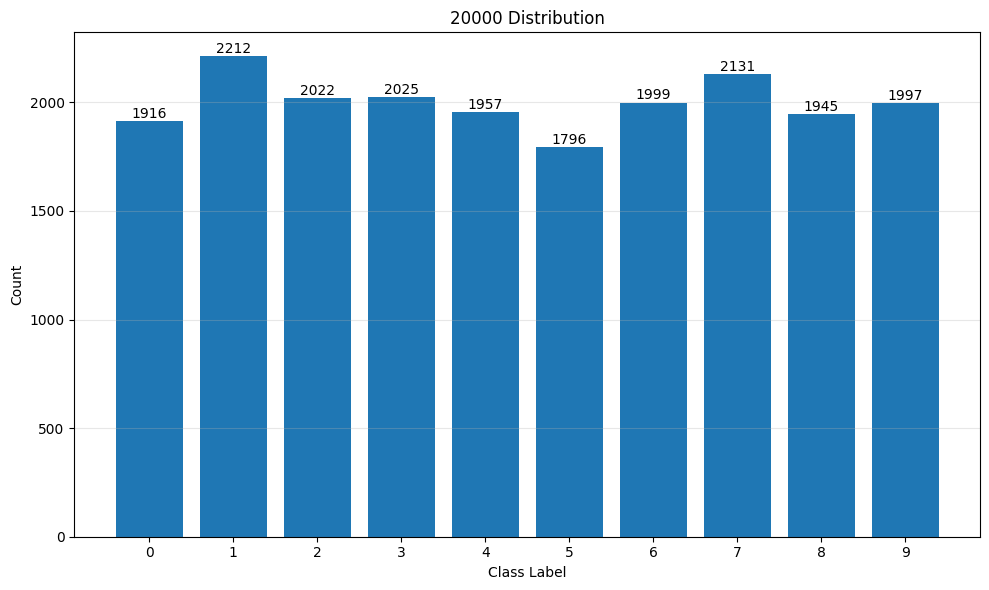

=== 20000 Distribution ===
Total samples: 20000
Class distribution:
  Class 0: 1916 samples (9.6%)
  Class 1: 2212 samples (11.1%)
  Class 2: 2022 samples (10.1%)
  Class 3: 2025 samples (10.1%)
  Class 4: 1957 samples (9.8%)
  Class 5: 1796 samples (9.0%)
  Class 6: 1999 samples (10.0%)
  Class 7: 2131 samples (10.7%)
  Class 8: 1945 samples (9.7%)
  Class 9: 1997 samples (10.0%)


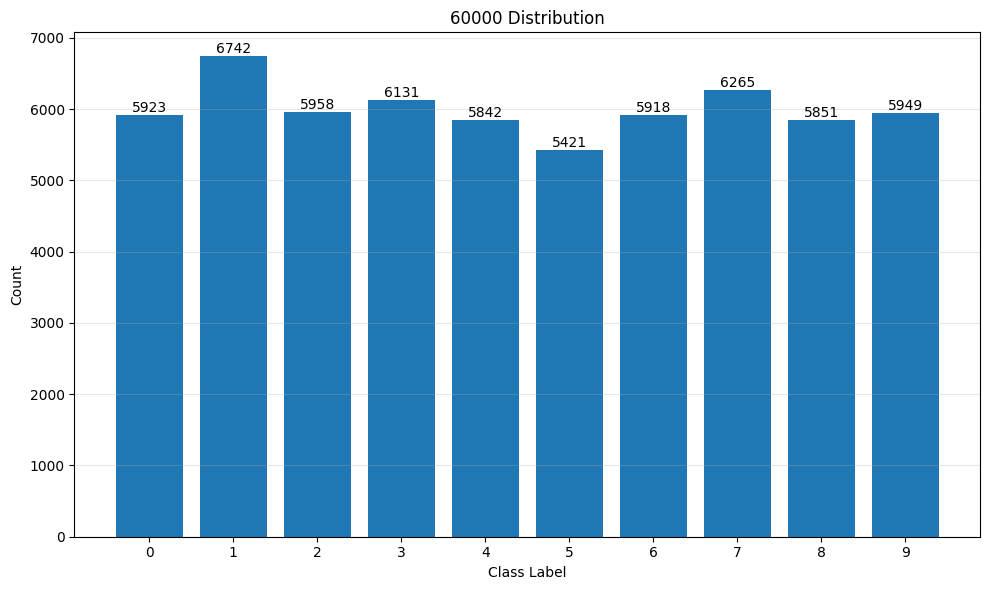

=== 60000 Distribution ===
Total samples: 60000
Class distribution:
  Class 0: 5923 samples (9.9%)
  Class 1: 6742 samples (11.2%)
  Class 2: 5958 samples (9.9%)
  Class 3: 6131 samples (10.2%)
  Class 4: 5842 samples (9.7%)
  Class 5: 5421 samples (9.0%)
  Class 6: 5918 samples (9.9%)
  Class 7: 6265 samples (10.4%)
  Class 8: 5851 samples (9.8%)
  Class 9: 5949 samples (9.9%)


In [7]:
for additional_data in dataset_quantities:
    # Assemble training dataset
    x_train = torch.cat([x_base_train, x_additional[:additional_data]], dim=0)
    y_train = torch.cat([y_base_train, y_additional[:additional_data]], dim=0)

    plot_label_distribution(y_train, f"{len(y_train)} Distribution")

## Imbalanced Dataset Preparation

We prepare class imbalanced datasets here.

In [8]:
def _select_indices_with_class_imbalance(y_data, available_indices, n_samples, target_labels, target_ratio, random_seed):
    """
    Internal helper function to select indices with class imbalance.
    
    Parameters:
    y_data: labels for the entire dataset
    available_indices: indices available for selection
    n_samples: number of samples to select
    target_labels: list of target labels to prioritize
    target_ratio: proportion of samples from target labels
    random_seed: random seed for reproducibility
    
    Returns:
    selected_indices: indices of selected samples
    """
    np.random.seed(random_seed)
    
    # Convert to numpy arrays if they're torch tensors
    if torch.is_tensor(y_data):
        y_data_np = y_data.cpu().numpy()
    else:
        y_data_np = y_data
    
    if torch.is_tensor(target_labels):
        target_labels_np = target_labels.cpu().numpy()
    else:
        target_labels_np = np.array(target_labels)
    
    # Separate available indices into target and non-target
    target_mask = np.isin(y_data_np[available_indices], target_labels_np)
    target_available_indices = available_indices[target_mask]
    non_target_available_indices = available_indices[~target_mask]
    
    # Calculate how many samples to take from each group
    n_target = min(int(n_samples * target_ratio), len(target_available_indices))
    n_non_target = n_samples - n_target
    
    if n_non_target > len(non_target_available_indices):
        # If we don't have enough non-target samples, take more target samples
        n_target = n_samples - len(non_target_available_indices)
        n_non_target = len(non_target_available_indices)
    
    # Randomly select from each group
    selected_target_indices = np.random.choice(target_available_indices, size=n_target, replace=False)
    selected_non_target_indices = np.random.choice(non_target_available_indices, size=n_non_target, replace=False)
    
    # Combine and return
    selected_indices = np.concatenate([selected_target_indices, selected_non_target_indices])
    np.random.shuffle(selected_indices)  # Shuffle to mix target and non-target
    
    return selected_indices

def get_base_indices_class(x_base, y_base, n_samples, target_labels, target_ratio=0.5, random_seed=42):
    """
    Get deterministic base indices with class imbalance - prioritizes target labels.
    
    Parameters:
    x_base: base data
    y_base: base labels
    n_samples: total number of samples to select
    target_labels: list of target labels to prioritize
    target_ratio: proportion of samples that should come from target labels (0-1)
    random_seed: random seed for reproducibility
    
    Returns:
    selected_indices: indices of selected samples
    """
    total_samples = len(x_base)
    
    if n_samples > total_samples:
        raise ValueError(f"n_samples ({n_samples}) cannot exceed total samples ({total_samples})")
    
    # All indices are available for base selection
    all_indices = np.arange(total_samples)
    
    return _select_indices_with_class_imbalance(
        y_data=y_base,
        available_indices=all_indices,
        n_samples=n_samples,
        target_labels=target_labels,
        target_ratio=target_ratio,
        random_seed=random_seed
    )

def get_additional_indices_class(x_base, y_base, excluded_indices, n_additional, 
                                target_labels, target_ratio=0.5, random_seed=42):
    """
    Get additional indices with class imbalance that do not overlap with excluded indices.
    
    Parameters:
    x_base: base data
    y_base: base labels
    excluded_indices: indices to exclude from selection
    n_additional: number of additional samples to select
    target_labels: list of target labels to prioritize
    target_ratio: proportion of samples that should come from target labels (0-1)
    random_seed: random seed for reproducibility
    
    Returns:
    selected_indices: indices of selected additional samples
    """
    total_samples = len(x_base)
    
    # Remove excluded indices
    all_indices = np.arange(total_samples)
    available_indices = np.setdiff1d(all_indices, excluded_indices)
    
    if n_additional > len(available_indices):
        raise ValueError(f"n_additional ({n_additional}) cannot exceed available samples ({len(available_indices)})")
    
    return _select_indices_with_class_imbalance(
        y_data=y_base,
        available_indices=available_indices,
        n_samples=n_additional,
        target_labels=target_labels,
        target_ratio=target_ratio,
        random_seed=random_seed
    )

def prepare_class_imbalanced_dataset(x_base, y_base, target_labels, dataset_quantities,
                                    base_data_size, target_ratio=0.5, data_seed=42, 
                                    seed_1=None, base_imbalanced = True, additional_imbalanced=True):
    """
    Prepare training and additional datasets with optional class imbalance for additional data.
    
    Parameters
    ----------
    x_base : torch.Tensor
        Full dataset features (shape: [N, ...])
    y_base : torch.Tensor
        Full dataset labels (shape: [N])
    target_labels : list or torch.Tensor
        List of target labels to prioritize
    dataset_quantities : list[int]
        List of dataset sizes, max determines how many additional samples to generate
    base_data_size : int
        Number of base samples to select for training
    target_ratio : float, optional
        Proportion of samples that should come from target labels (default: 0.5)
    data_seed : int, optional
        Random seed for reproducibility
    seed_1: random seed for getting additional indices
    additional_imbalanced : bool, optional
        Whether to apply class imbalance to additional data (default: True)
        If False, uses the original get_additional_indices function

    Returns
    -------
    x_base_train : torch.Tensor
        Base training inputs
    y_base_train : torch.Tensor
        Base training labels
    x_additional : torch.Tensor
        Additional inputs
    y_additional : torch.Tensor
        Additional labels
    """
    # ----------------------------
    # 1. Select base training set with class imbalance
    # ----------------------------
    if base_imbalanced:
        base_indices = get_base_indices_class(
            x_base=x_base, 
            y_base=y_base,
            n_samples=base_data_size,
            target_labels=target_labels,
            target_ratio=target_ratio,
            random_seed=data_seed
        )
    else:
        base_indices = get_base_indices(x_base=x_base, y_base=y_base,
                                n_samples=base_data_size,
                                random_seed=data_seed)
    x_base_train = x_base[base_indices]
    y_base_train = y_base[base_indices]

    # ----------------------------
    # 2. Prepare additional dataset
    # ----------------------------
    max_additional_indices = max(dataset_quantities)
    seed_1 = seed_1 or data_seed
    
    if additional_imbalanced:
        # Use class-imbalanced selection for additional data
        additional_indices = get_additional_indices_class(
            x_base=x_base, 
            y_base=y_base,
            excluded_indices=base_indices,
            n_additional=max_additional_indices,
            target_labels=target_labels,
            target_ratio=target_ratio,
            random_seed=seed_1
        )
    else:
        # Use original balanced selection for additional data
        additional_indices = get_additional_indices(
            x_base=x_base,
            y_base=y_base,
            excluded_indices=base_indices,
            n_additional=max_additional_indices,
            random_seed=seed_1
        )
    
    x_additional = x_base[additional_indices]
    y_additional = y_base[additional_indices]

    return x_base_train, y_base_train, x_additional, y_additional

First, we generate both base and additional data imbalanced. Note that by our randomization algorithm, we can't do any imbalancing even at small additional sets if we are asking for additional sets that are too large.

In [9]:
dataset_quantities = [0, 600-60, 2000 - 60, 6000 - 60, 20000 - 60]

x_base_train_class, y_base_train_class, x_additional_class, y_additional_class = prepare_class_imbalanced_dataset(
    x_base=x_base,
    y_base=y_base,
    target_labels = [0],
    dataset_quantities=dataset_quantities,
    base_data_size=base_data_size,
    target_ratio=0.5,
    data_seed=data_seed,
    seed_1=None,
)

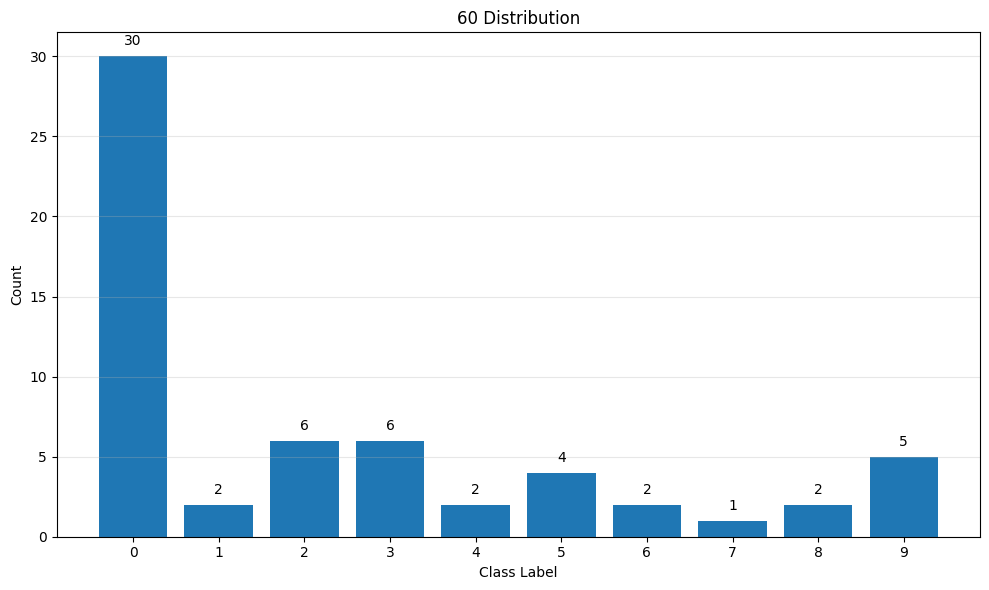

=== 60 Distribution ===
Total samples: 60
Class distribution:
  Class 0: 30 samples (50.0%)
  Class 1: 2 samples (3.3%)
  Class 2: 6 samples (10.0%)
  Class 3: 6 samples (10.0%)
  Class 4: 2 samples (3.3%)
  Class 5: 4 samples (6.7%)
  Class 6: 2 samples (3.3%)
  Class 7: 1 samples (1.7%)
  Class 8: 2 samples (3.3%)
  Class 9: 5 samples (8.3%)


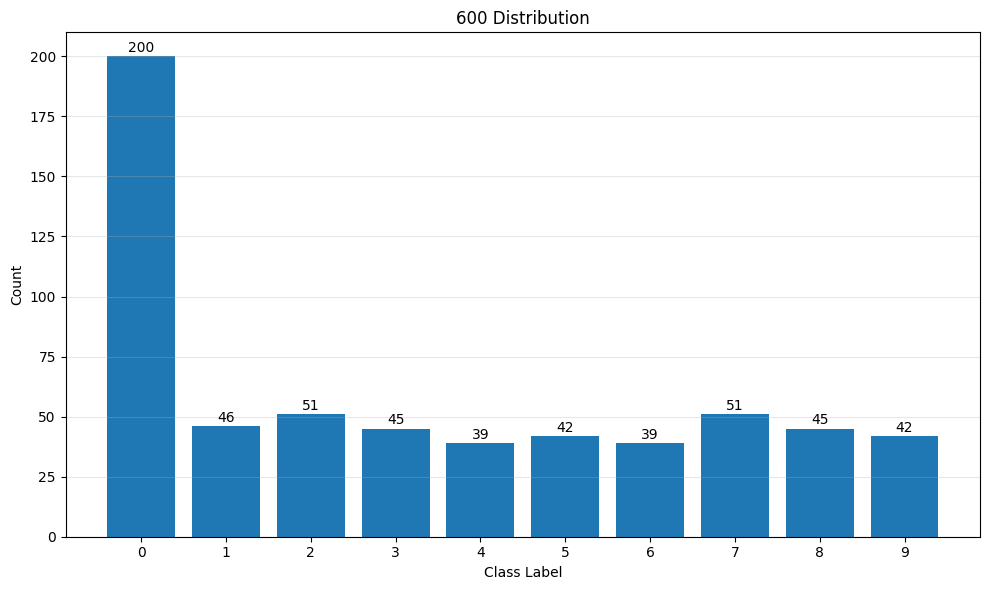

=== 600 Distribution ===
Total samples: 600
Class distribution:
  Class 0: 200 samples (33.3%)
  Class 1: 46 samples (7.7%)
  Class 2: 51 samples (8.5%)
  Class 3: 45 samples (7.5%)
  Class 4: 39 samples (6.5%)
  Class 5: 42 samples (7.0%)
  Class 6: 39 samples (6.5%)
  Class 7: 51 samples (8.5%)
  Class 8: 45 samples (7.5%)
  Class 9: 42 samples (7.0%)


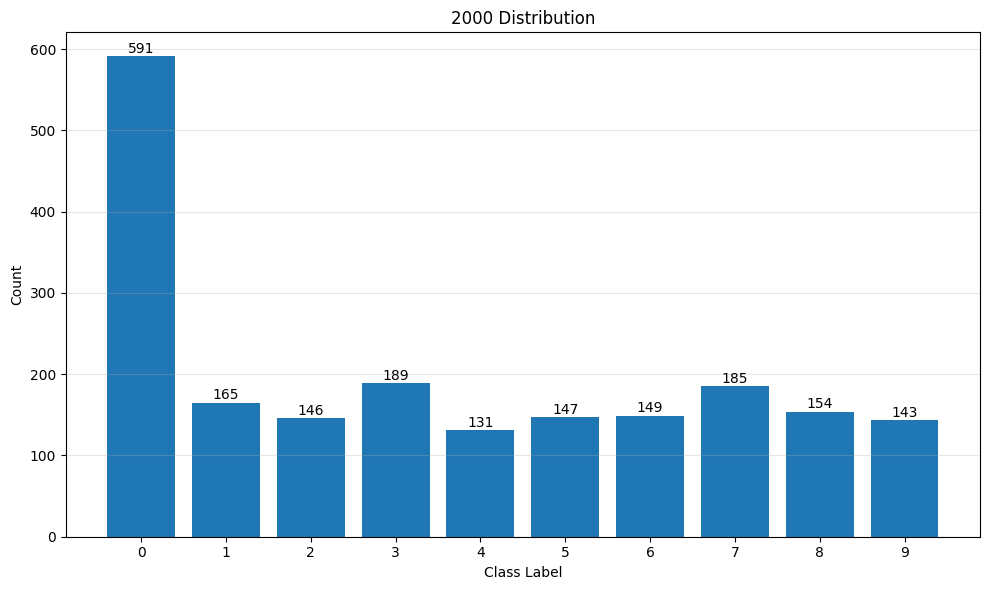

=== 2000 Distribution ===
Total samples: 2000
Class distribution:
  Class 0: 591 samples (29.5%)
  Class 1: 165 samples (8.2%)
  Class 2: 146 samples (7.3%)
  Class 3: 189 samples (9.4%)
  Class 4: 131 samples (6.6%)
  Class 5: 147 samples (7.3%)
  Class 6: 149 samples (7.4%)
  Class 7: 185 samples (9.2%)
  Class 8: 154 samples (7.7%)
  Class 9: 143 samples (7.1%)


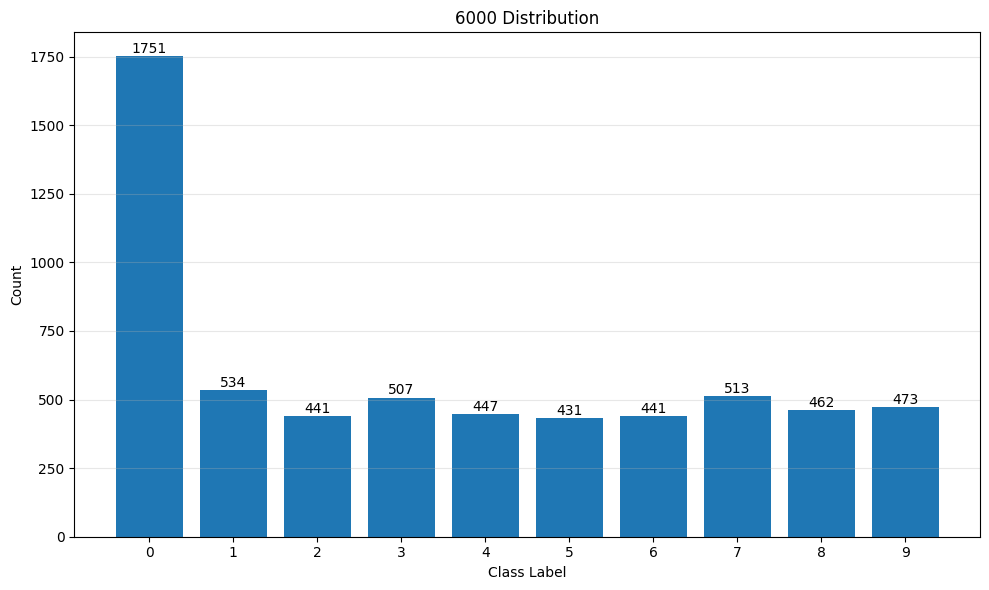

=== 6000 Distribution ===
Total samples: 6000
Class distribution:
  Class 0: 1751 samples (29.2%)
  Class 1: 534 samples (8.9%)
  Class 2: 441 samples (7.3%)
  Class 3: 507 samples (8.5%)
  Class 4: 447 samples (7.4%)
  Class 5: 431 samples (7.2%)
  Class 6: 441 samples (7.3%)
  Class 7: 513 samples (8.6%)
  Class 8: 462 samples (7.7%)
  Class 9: 473 samples (7.9%)


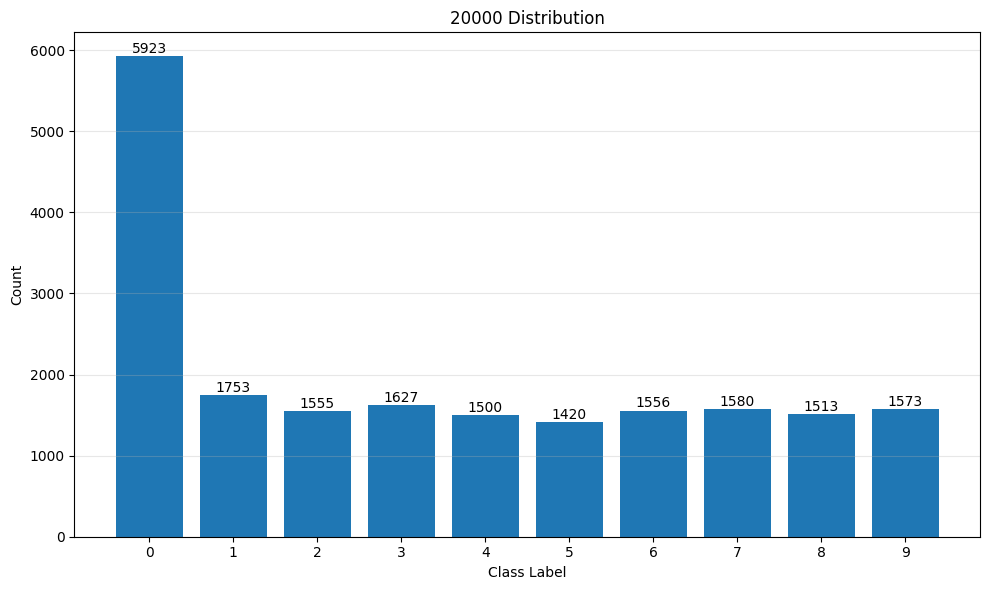

=== 20000 Distribution ===
Total samples: 20000
Class distribution:
  Class 0: 5923 samples (29.6%)
  Class 1: 1753 samples (8.8%)
  Class 2: 1555 samples (7.8%)
  Class 3: 1627 samples (8.1%)
  Class 4: 1500 samples (7.5%)
  Class 5: 1420 samples (7.1%)
  Class 6: 1556 samples (7.8%)
  Class 7: 1580 samples (7.9%)
  Class 8: 1513 samples (7.6%)
  Class 9: 1573 samples (7.9%)


In [10]:
for additional_data in dataset_quantities:
    # Assemble training dataset
    x_train = torch.cat([x_base_train_class, x_additional_class[:additional_data]], dim=0)
    y_train = torch.cat([y_base_train_class, y_additional_class[:additional_data]], dim=0)

    plot_label_distribution(y_train, f"{len(y_train)} Distribution")

Next, we test generating only base imbalanced data. Specify 0 and 1 being extremely dominant, and then generate extra data that is not imbalanced.

In [11]:
base_data_size = 600
dataset_quantities = [0, 2000 - 600, 6000 - 600, 20000 - 600]

x_base_train_class, y_base_train_class, x_additional_class, y_additional_class = prepare_class_imbalanced_dataset(
    x_base=x_base,
    y_base=y_base,
    target_labels = [0, 1],
    dataset_quantities=dataset_quantities,
    base_data_size=base_data_size,
    target_ratio=0.9,
    data_seed=data_seed,
    seed_1=None,
    additional_imbalanced = False,
)

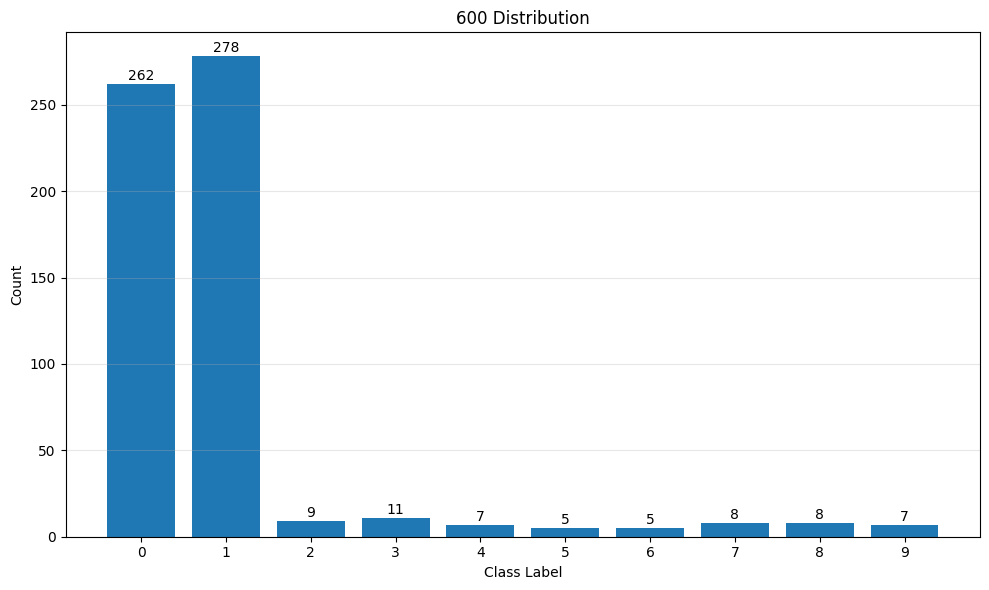

=== 600 Distribution ===
Total samples: 600
Class distribution:
  Class 0: 262 samples (43.7%)
  Class 1: 278 samples (46.3%)
  Class 2: 9 samples (1.5%)
  Class 3: 11 samples (1.8%)
  Class 4: 7 samples (1.2%)
  Class 5: 5 samples (0.8%)
  Class 6: 5 samples (0.8%)
  Class 7: 8 samples (1.3%)
  Class 8: 8 samples (1.3%)
  Class 9: 7 samples (1.2%)


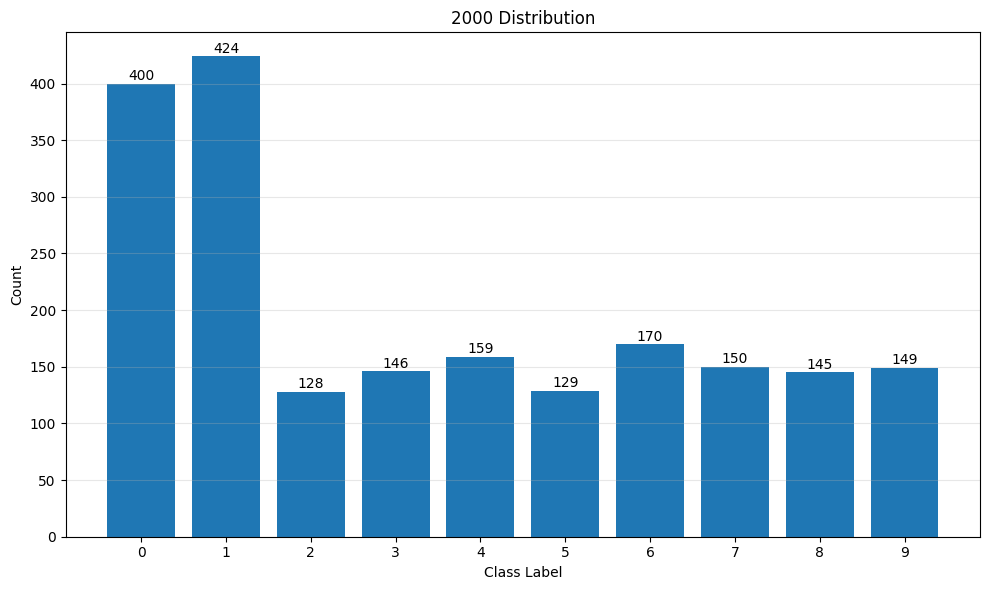

=== 2000 Distribution ===
Total samples: 2000
Class distribution:
  Class 0: 400 samples (20.0%)
  Class 1: 424 samples (21.2%)
  Class 2: 128 samples (6.4%)
  Class 3: 146 samples (7.3%)
  Class 4: 159 samples (8.0%)
  Class 5: 129 samples (6.5%)
  Class 6: 170 samples (8.5%)
  Class 7: 150 samples (7.5%)
  Class 8: 145 samples (7.2%)
  Class 9: 149 samples (7.4%)


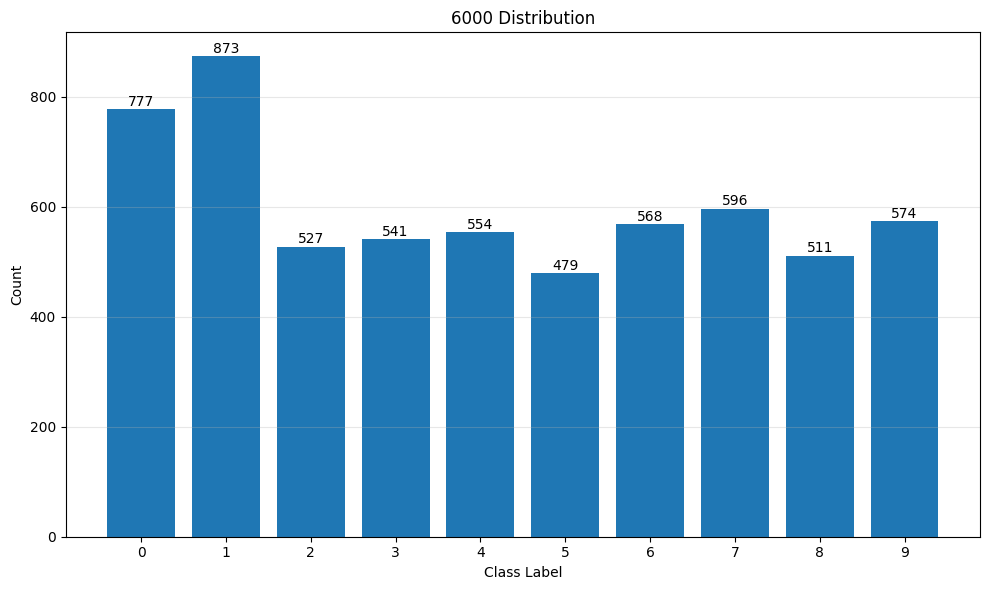

=== 6000 Distribution ===
Total samples: 6000
Class distribution:
  Class 0: 777 samples (13.0%)
  Class 1: 873 samples (14.5%)
  Class 2: 527 samples (8.8%)
  Class 3: 541 samples (9.0%)
  Class 4: 554 samples (9.2%)
  Class 5: 479 samples (8.0%)
  Class 6: 568 samples (9.5%)
  Class 7: 596 samples (9.9%)
  Class 8: 511 samples (8.5%)
  Class 9: 574 samples (9.6%)


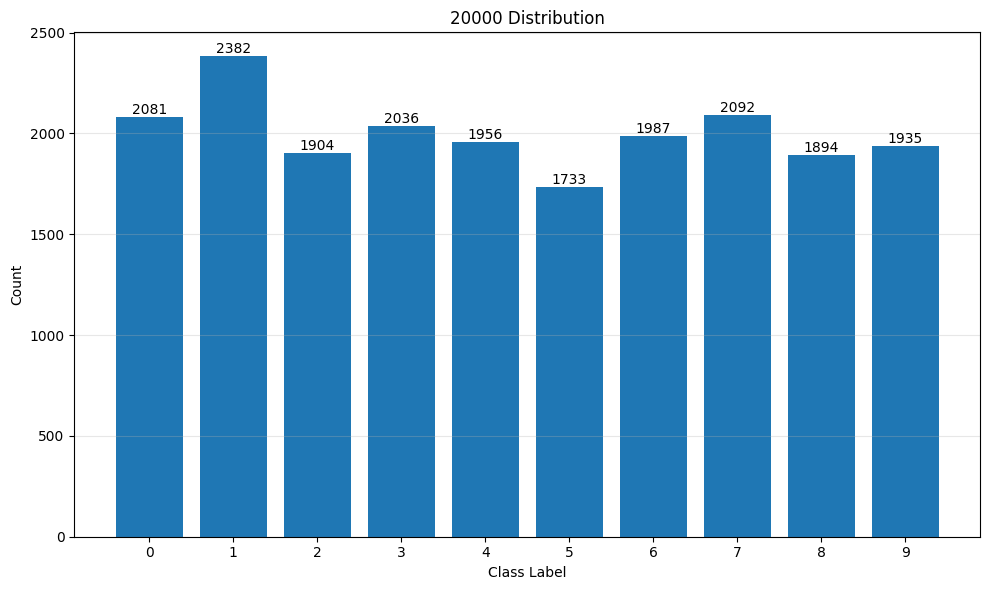

=== 20000 Distribution ===
Total samples: 20000
Class distribution:
  Class 0: 2081 samples (10.4%)
  Class 1: 2382 samples (11.9%)
  Class 2: 1904 samples (9.5%)
  Class 3: 2036 samples (10.2%)
  Class 4: 1956 samples (9.8%)
  Class 5: 1733 samples (8.7%)
  Class 6: 1987 samples (9.9%)
  Class 7: 2092 samples (10.5%)
  Class 8: 1894 samples (9.5%)
  Class 9: 1935 samples (9.7%)


In [12]:
for additional_data in dataset_quantities:
    # Assemble training dataset
    x_train = torch.cat([x_base_train_class, x_additional_class[:additional_data]], dim=0)
    y_train = torch.cat([y_base_train_class, y_additional_class[:additional_data]], dim=0)

    plot_label_distribution(y_train, f"{len(y_train)} Distribution")

Finally, we generate base balanced data, and then add additional data that is imbalanced.

In [13]:
x_base_train_class, y_base_train_class, x_additional_class, y_additional_class = prepare_class_imbalanced_dataset(
    x_base=x_base,
    y_base=y_base,
    target_labels = [0, 1],
    dataset_quantities=dataset_quantities,
    base_data_size=base_data_size,
    target_ratio=0.9,
    data_seed=data_seed,
    seed_1=None,
    base_imbalanced = False,
)

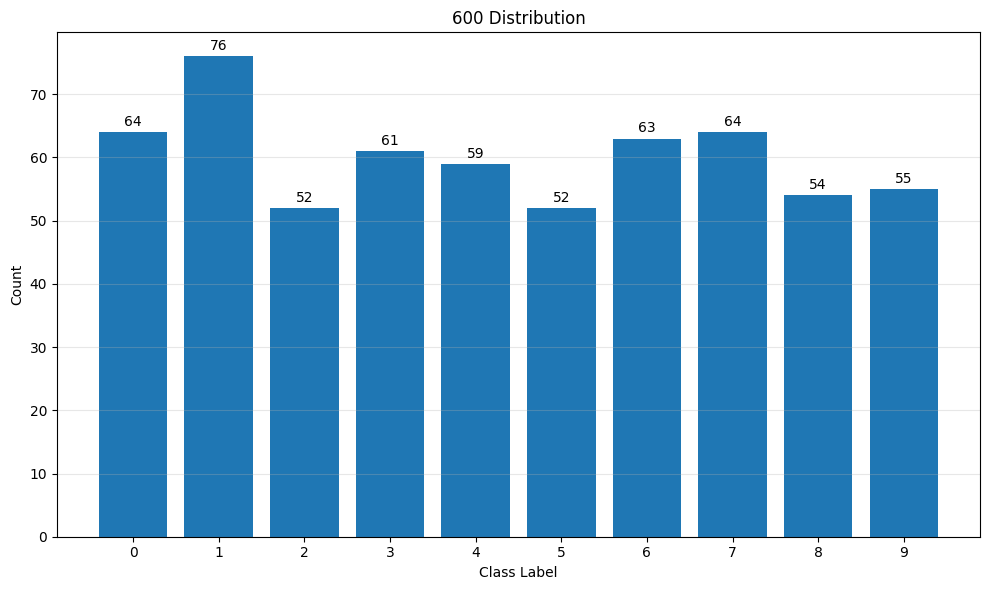

=== 600 Distribution ===
Total samples: 600
Class distribution:
  Class 0: 64 samples (10.7%)
  Class 1: 76 samples (12.7%)
  Class 2: 52 samples (8.7%)
  Class 3: 61 samples (10.2%)
  Class 4: 59 samples (9.8%)
  Class 5: 52 samples (8.7%)
  Class 6: 63 samples (10.5%)
  Class 7: 64 samples (10.7%)
  Class 8: 54 samples (9.0%)
  Class 9: 55 samples (9.2%)


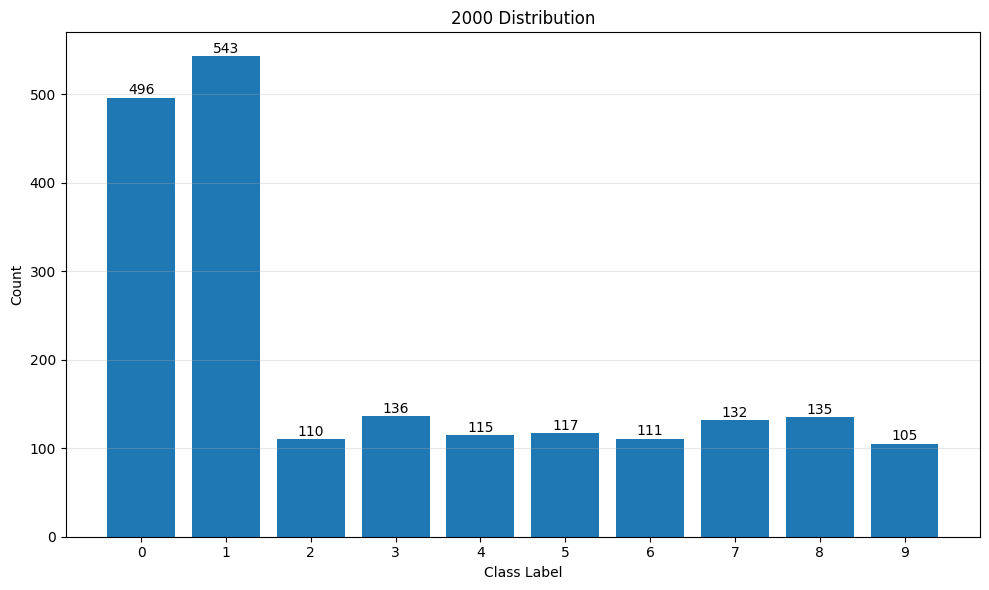

=== 2000 Distribution ===
Total samples: 2000
Class distribution:
  Class 0: 496 samples (24.8%)
  Class 1: 543 samples (27.2%)
  Class 2: 110 samples (5.5%)
  Class 3: 136 samples (6.8%)
  Class 4: 115 samples (5.8%)
  Class 5: 117 samples (5.9%)
  Class 6: 111 samples (5.5%)
  Class 7: 132 samples (6.6%)
  Class 8: 135 samples (6.8%)
  Class 9: 105 samples (5.2%)


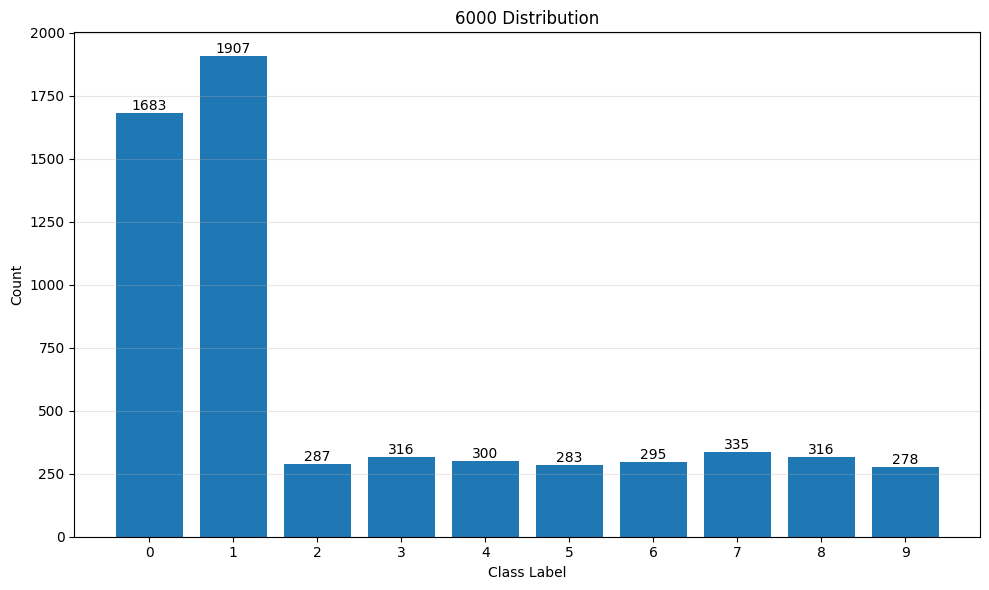

=== 6000 Distribution ===
Total samples: 6000
Class distribution:
  Class 0: 1683 samples (28.1%)
  Class 1: 1907 samples (31.8%)
  Class 2: 287 samples (4.8%)
  Class 3: 316 samples (5.3%)
  Class 4: 300 samples (5.0%)
  Class 5: 283 samples (4.7%)
  Class 6: 295 samples (4.9%)
  Class 7: 335 samples (5.6%)
  Class 8: 316 samples (5.3%)
  Class 9: 278 samples (4.6%)


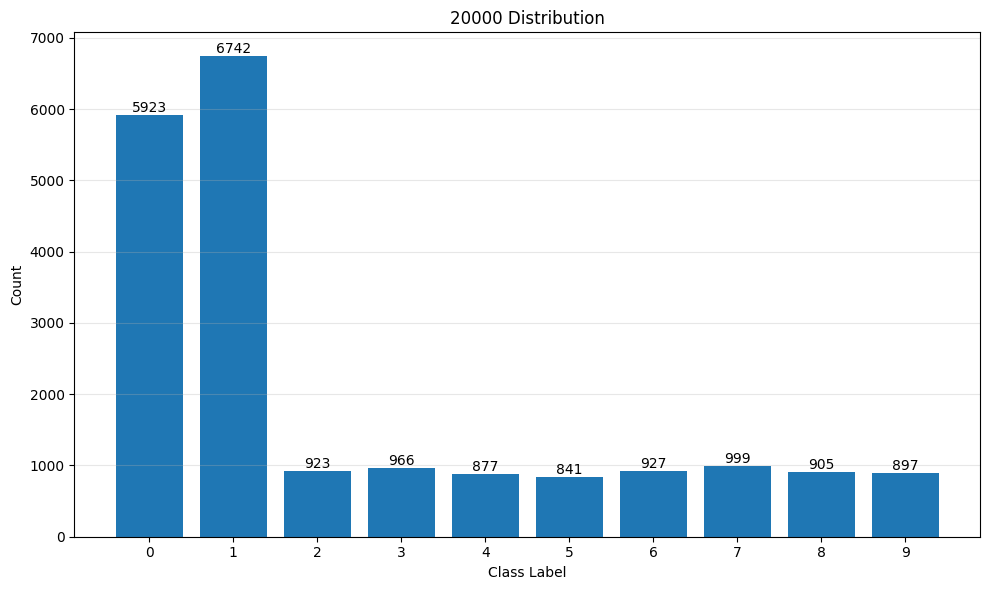

=== 20000 Distribution ===
Total samples: 20000
Class distribution:
  Class 0: 5923 samples (29.6%)
  Class 1: 6742 samples (33.7%)
  Class 2: 923 samples (4.6%)
  Class 3: 966 samples (4.8%)
  Class 4: 877 samples (4.4%)
  Class 5: 841 samples (4.2%)
  Class 6: 927 samples (4.6%)
  Class 7: 999 samples (5.0%)
  Class 8: 905 samples (4.5%)
  Class 9: 897 samples (4.5%)


In [14]:
for additional_data in dataset_quantities:
    # Assemble training dataset
    x_train = torch.cat([x_base_train_class, x_additional_class[:additional_data]], dim=0)
    y_train = torch.cat([y_base_train_class, y_additional_class[:additional_data]], dim=0)

    plot_label_distribution(y_train, f"{len(y_train)} Distribution")